# $\bm{7}$ $\enspace$ **自动求导**

### $\bm{7.1}$ $\enspace$ **一个简单的例子**

假设我们想对函数 $y=2\bm{x}^T\bm{x}$ 关于列向量 $\bm{x}$ 求导

In [1]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

我们在计算 $y$ 关于 $\bm{x}$ 的梯度之前，我们需要一个地方来存储梯度

In [2]:
x.requires_grad_(True)
x.grad # 默认值是None

现在让我们计算 $y$

In [4]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

通过调用反向传播函数来自动计算 `y` 关于 `x` 每个分量的梯度

In [5]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [6]:
x.grad == 4 * x

tensor([True, True, True, True])

现在让我们计算 `x` 的另一个函数

In [7]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### $\bm{7.2}$ $\enspace$ **非标量变量的反向传播**

深度学习中，我们的目的不是计算微分矩阵，而是批量中每个样本单独计算的偏导数之和

In [8]:
x.grad.zero_()
y = x * x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

### $\bm{7.3}$ $\enspace$ **分离计算**

将某些计算移动到记录的计算图之外

In [9]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [10]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

### $\bm{7.4}$ $\enspace$ **Python 控制流的梯度计算**

即使构建函数的计算图需要通过 Python 控制流（例如，条件、循环或任意函数调用），我们仍然可以计算得到的变量的梯度

In [11]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

a.grad == d / a

tensor(True)

### $\bm{7.5}$ $\enspace$ **习题**

使 $f(x) = sin(x)$，绘制 $f(x)$ 和 $\dfrac{\mathrm{d}f(x)}{\mathrm{d}x}$ 的图像，其中后者不使⽤ $f'(x) = cos(x)$

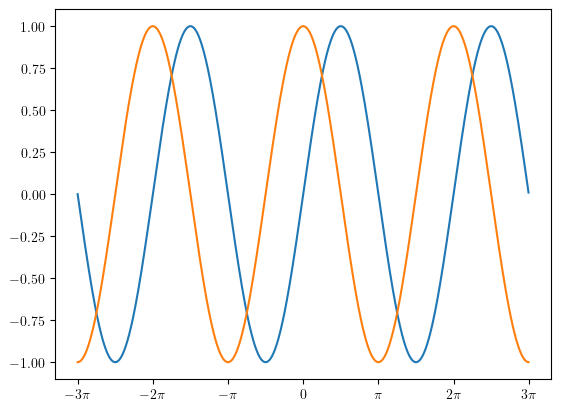

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc


def get_function(x):
    return np.sin(x)


def get_derivative(function, x):
    h = 1e-4
    return (function(x + h) - function(x)) / h


x = np.arange(-3 * np.pi, 3 * np.pi, 0.01)
y = get_function(x)
y_derivative = get_derivative(get_function, x)
plt.rc("text", usetex=True)
plt.plot(x, y)
plt.plot(x, y_derivative)
xlabel = [r'$-3\pi$', r'$-2\pi$', r'$-\pi$', r'$0$', r'$\pi$', r'$2\pi$', r'$3\pi$']
plt.xticks([-3 * np.pi, -2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi, 3* np.pi], labels=xlabel)
plt.show()
